# Ratemaps

*Imports and data_folder access*

In [7]:
import pickle
import numpy as np
from pathlib import Path
import glob
import pandas as pd
import matplotlib.pyplot as plt

# switch the path to represent the correct directory when switching devices and fetch the latest repo from github
# Marc_PC
#data_folder_1 = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
#data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
#data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

# Amber_laptop
data_folder_1 = Path(r"C:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data")
data_folder_2 = Path(r"Z:\davide\2p_data\441394_ribolla")
data_folder_3 = Path(r"Z:\davide\2p_data\441406_fiano")

In [2]:
# Path to where the data is on your machine.
data_path_1 = data_folder_1.joinpath('20230211')

# ribolla files
data_path_2 = data_folder_2.joinpath('20230315')
data_path_3 = data_folder_2.joinpath('20230324')
data_path_4 = data_folder_2.joinpath('20230331')
data_path_5 = data_folder_2.joinpath('20230404')
data_path_6 = data_folder_2.joinpath('20230405')

# fiano files
data_path_7 = data_folder_3.joinpath('20230309')
data_path_8 = data_folder_3.joinpath('20230317')
data_path_9 = data_folder_3.joinpath('20230323')
data_path_10 = data_folder_3.joinpath('20230328')
data_path_11 = data_folder_3.joinpath('20230331')

# Create a list to store all the data paths
all_data_paths = [
    data_path_1,
    data_path_2,
    data_path_3,
    data_path_4,
    data_path_5,
    data_path_6,
    data_path_7,
    data_path_8,
    data_path_9,
    data_path_10,
    data_path_11
]

In [3]:
for i in all_data_paths:
    print(i)

C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\data\20230211
Z:\davide\2p_data\441394_ribolla\20230315
Z:\davide\2p_data\441394_ribolla\20230324
Z:\davide\2p_data\441394_ribolla\20230331
Z:\davide\2p_data\441394_ribolla\20230404
Z:\davide\2p_data\441394_ribolla\20230405
Z:\davide\2p_data\441406_fiano\20230309
Z:\davide\2p_data\441406_fiano\20230317
Z:\davide\2p_data\441406_fiano\20230323
Z:\davide\2p_data\441406_fiano\20230328
Z:\davide\2p_data\441406_fiano\20230331


In [4]:
import sys
sys.path.append('../src') # Add src folder to path.
import file_management as fm # Import my file_management functions from /src.

selected_data_session = all_data_paths[1] # select one of the sessions! 0-10
fm.get_files_in_data_path(selected_data_session)

[]

In [5]:
selected_data_session

WindowsPath('Z:/davide/2p_data/441394_ribolla/20230315')

In [24]:
import os

# List all the files in the selected data session
files = os.listdir(selected_data_session)
print(files)

['behaviour_data.pickle', 'cnmf.hdf5', 'decoded_log.mat', 'metrics.pickle', 'neural_data.pickle', 'parameters.yml', 'tif_header.pickle', 'trial_data.csv']


*Trial Matrix*

In [25]:
# Update the trial_data_file and read the CSV file (accessing a specific file within the selected data session)
trial_data_file = selected_data_session.joinpath('trial_data.csv')
trial_data = pd.read_csv(trial_data_file)
#trial_data

*Behavioural Data*

In [26]:
# Load behavioural data.
bdata_file = selected_data_session.joinpath('behaviour_data.pickle')
with open(bdata_file,'rb') as file:
    b_data = pickle.load(file)

*(SELECT SUBSET and ENV/RWzone) Normpos and sliced time computation*

In [27]:
import ratemaps as rm

# Can just use trial_data instead of a subset to run over the entire trial.
# Subset the data for env_label = 1, 2 or 3!
subset = trial_data[trial_data['env_label'] == 1]

# Define the onset and offset column names to cut the data from the trial matrix!
# it is also of interest to see reward_zone_onset - tunnel2_onset
onset_col = 'env_onset' #reward_zone_onset
offset_col = 'tunnel1_onset' #tunnel2_onset

# Call the process_subset function with the correct arguments.
norm_pos, sliced_time = rm.normpos_slicedtime(subset, b_data, onset_col, offset_col)

# Use the normalized positions and sliced times as needed.
print(norm_pos)
print(sliced_time)

0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
[4.65661287e-10 4.65661287e-10 4.65661287e-10 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[ -27.16141354  -27.16041354  -27.15941354 ... 2029.91858646 2029.91958646
 2029.92058646]


In [ ]:
time = b_data['time']
time

array([ -10.51204467,  -10.51104467,  -10.51004467, ..., 1697.15695533,
       1697.15795533, 1697.15895533])

*Neural Data*

In [17]:
# Neural data
ndata_file = selected_data_session.joinpath('neural_data.pickle')
with open(ndata_file,'rb') as file:
    n_data = pickle.load(file)

In [77]:
n_pos, sliced_time,sliced_spikes = slice_data(subset,b_data,n_data,onset_col,offset_col)

0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497


In [81]:
spike_positions = [np.interp(s,sliced_time , n_pos) for s in sliced_spikes]

In [90]:
def slice_data(subset, b_data, n_data, onset_col, offset_col, shuffle_spikes = False):
    """

    """
    # Extract the position and time information out of the behavioural data.
    position = b_data["position"]
    times = b_data["time"]
    spikes = n_data["deconvolved"]
    dt = 1 / 30.0  # scanner recording frequency
    end_time = n_data["traces"].shape[1]*dt
    scanner_times = np.arange(0, end_time, dt)

    
    if shuffle_spikes:
        spike_times = []
        for s in spikes:
            random_shift  = np.random.choice(np.arange(len(scanner_times)))
            shifted_spikes = (s + random_shift) % len(scanner_times)
            spike_times.append(scanner_times[shifted_spikes])

    else:
        spike_times = []
        for s in spikes:
            spike_times.append(scanner_times[s])

    # Subset selection.
    sliced_spikes = [[] for i in spike_times]
    for i in range(len(subset)):
        row = subset.iloc[i]

        # On- and offset definition within the trial.
        onset = row[onset_col].astype(int)
        offset = row[offset_col]

        pos_segment = position[onset:offset]
        time_segment = times[onset:offset]
        print(f"{i}: {np.max(pos_segment)-np.min(pos_segment)}")

        # Normalize
        pos_segment = (pos_segment - np.min(pos_segment)) / (
            np.max(pos_segment) - np.min(pos_segment)
        )

        for j,cell_spikes in enumerate(spike_times):
            sliced_spikes[j] += [s for s in cell_spikes if (s>=times[onset] and s<=times[offset])]

        if i == 0:
            norm_pos = pos_segment
            sliced_time = time_segment
        else:
            norm_pos = np.hstack([norm_pos, pos_segment])
            sliced_time = np.hstack([sliced_time, time_segment])

    return norm_pos, sliced_time, sliced_spikes


In [91]:

# NULL
n_shuff = 20
null_spatial_info_distr = []

for n in range(n_shuff):
    n_pos, sliced_time,sliced_spikes = slice_data(subset,b_data,n_data,onset_col,offset_col,shuffle_spikes=True)
    spike_positions = [np.interp(s,sliced_time , n_pos) for s in sliced_spikes]
    firing_rate_maps, occupancy = rm.compute_firing_rate_maps(spike_positions, norm_pos)
    spatial_info = rm.calculate_spatial_info(firing_rate_maps, occupancy)

    for s in spatial_info:
        null_spatial_info_distr.append(s)

# EXPERIMENTAL
n_pos, sliced_time,sliced_spikes = slice_data(subset,b_data,n_data,onset_col,offset_col)
spike_positions = [np.interp(s,sliced_time , n_pos) for s in sliced_spikes]
firing_rate_maps, occupancy = rm.compute_firing_rate_maps(spike_positions, norm_pos)
spatial_info = rm.calculate_spatial_info(firing_rate_maps, occupancy)





0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2: 1503
3: 1502
4: 1493
5: 1500
6: 1494
7: 1496
8: 1498
9: 1504
10: 1501
11: 1501
12: 1502
13: 1497
0: 4294967295
1: 1494
2:

*Firing rate maps*

In [83]:
firing_rate_maps, occupancy = rm.compute_firing_rate_maps(spike_positions, norm_pos)
#shuff_firing_rate_maps, _ = rm.compute_firing_rate_maps(shuff_spike_positions, norm_pos)

# Gives the occupancy
# Also gives spikes_hist for plotting
#plt.plot(spikes_hist[0])

In [ ]:
# not normalised
#save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\ratemaps")

#rm.plot_tuning_curves(firing_rate_maps, selected_data_session, subset, onset_col, save_folder)

In [64]:
# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("Current Directory:", current_directory)

Current Directory: c:\Users\renek\OneDrive\Documenten\Marc Studiemap\Master Internship 1\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\notebooks


In [69]:
# normalized
normalized_ratemaps, occupancy = rm.compute_normalised_firing_rate_maps(spike_positions, norm_pos)
#'..\plots\ratemaps'

# Relative path for save folder
save_folder = Path("..", "plots", "ratemaps")

# Convert the relative path to an absolute path
save_folder = save_folder.resolve()

# Make sure the save folder exists
save_folder.mkdir(parents=True, exist_ok=True)

# ...


#save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\ratemaps")
#rm.plot_tuning_curves(normalized_ratemaps, selected_data_session, subset, onset_col, save_folder)
#np.max(normalized_ratemaps,axis=1) # check if normalized

In [66]:
save_folder

WindowsPath('C:/Users/renek/OneDrive/Documenten/Marc Studiemap/Master Internship 1/Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction/plots/ratemaps')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\plots\\ratemaps\\20230315_subset_1_env_onset_ratemaps.png'

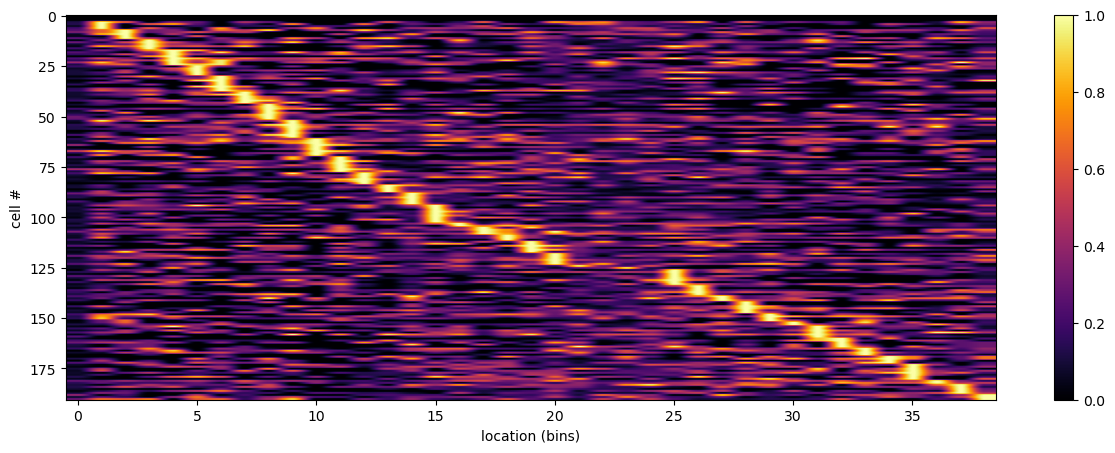

In [84]:
normalized_ratemaps, occupancy = rm.compute_normalised_firing_rate_maps(shuff_spike_positions, norm_pos)
'..\plots\ratemaps'
save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\ratemaps")
rm.plot_tuning_curves(normalized_ratemaps, selected_data_session, subset, onset_col, save_folder)

*Spatial information and histogram of spatial info*

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\marc_\\OneDrive\\Documents\\Studie\\Master\\Master Internship 1 Neurophysics\\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\\plots\\spatial_information_histograms\\20230315_subset_1_env_onset_spatial_info_histogram.png'

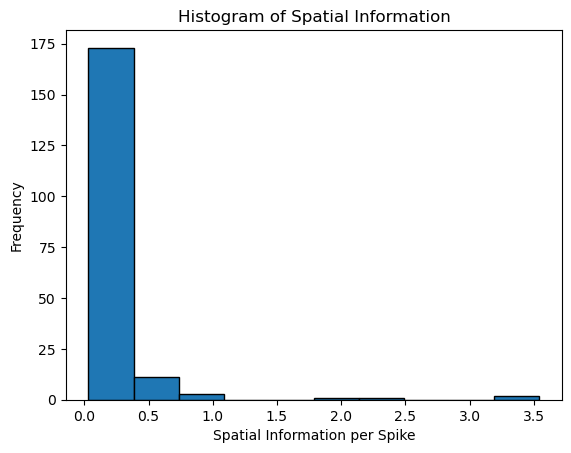

In [85]:
spatial_info = rm.calculate_spatial_info(firing_rate_maps, occupancy)
#shuff_spatial_info = rm.calculate_spatial_info(shuff_firing_rate_maps, occupancy)


save_folder = Path(r"C:\Users\marc_\OneDrive\Documents\Studie\Master\Master Internship 1 Neurophysics\Project-collective-cortical-dynamics-with-non-linear-dimensionality-reduction\plots\spatial_information_histograms")
plt.figure()
rm.plot_spatial_info(spatial_info, selected_data_session, subset, onset_col, save_folder)
plit.figure()
rm.plot_spatial_info(shuff_spatial_info, selected_data_session, subset, onset_col, save_folder)

(array([173.,  11.,   3.,   0.,   0.,   1.,   1.,   0.,   0.,   2.]),
 array([0.20729985, 0.5584525 , 0.90960515, 1.2607578 , 1.61191045,
        1.96306311, 2.31421576, 2.66536841, 3.01652106, 3.36767371,
        3.71882636]),
 <BarContainer object of 10 artists>)

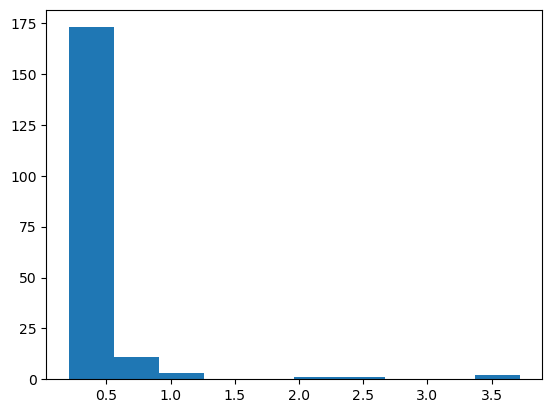

In [88]:
plt.hist(spatial_info)

(array([0.40768163, 1.52880612, 0.83574734, 0.57075428, 0.26499306,
        0.04076816, 0.10192041, 0.        , 0.06115224, 0.        ,
        0.02038408, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02038408, 0.        , 0.02038408]),
 array([0.14275607, 0.40095549, 0.6591549 , 0.91735431, 1.17555372,
        1.43375314, 1.69195255, 1.95015196, 2.20835137, 2.46655079,
        2.7247502 , 2.98294961, 3.24114903, 3.49934844, 3.75754785,
        4.01574726, 4.27394668, 4.53214609, 4.7903455 , 5.04854492,
        5.30674433]),
 <BarContainer object of 20 artists>)

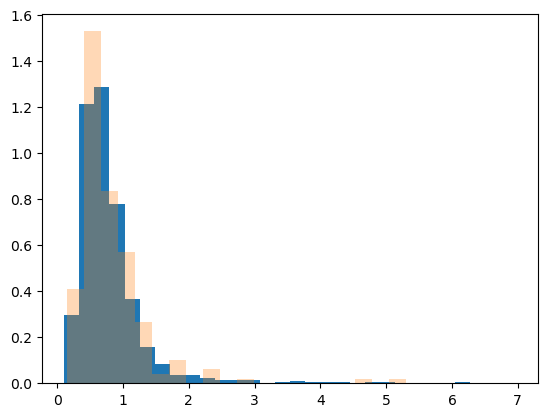

In [92]:
plt.hist(null_spatial_info_distr,density=True,bins=30)
plt.hist(spatial_info,density=True,alpha=0.3,bins=20)

In [95]:
place_cell_th = np.percentile(null_spatial_info_distr,95)
n_place_cells = 0
for i in spatial_info:
    if i>place_cell_th:
        n_place_cells += 1

print(f'place cells {n_place_cells}/{len(spatial_info)}')

place cells 11/190
